In [1]:
import pandas
import seaborn as sns

sns.set_theme()

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [5]:
titanic = pandas.read_csv(url)

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


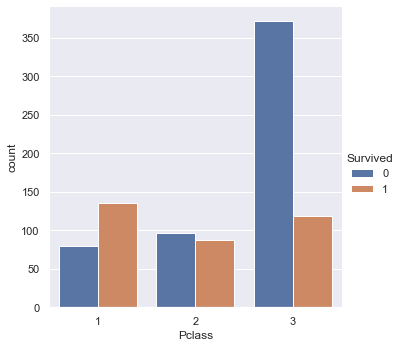

In [9]:
sns.catplot(data=titanic, hue='Survived', x='Pclass', kind='count')

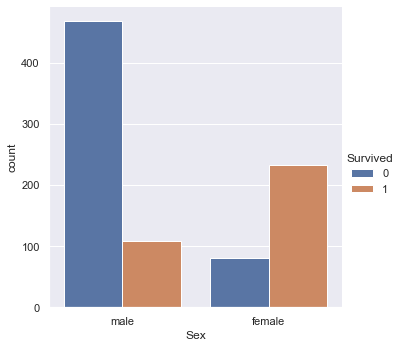

In [10]:
sns.catplot(data=titanic, hue='Survived', x='Sex', kind='count')

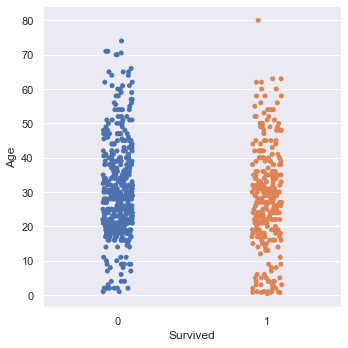

In [11]:
sns.catplot(data=titanic, y='Age', x='Survived')

In [13]:
titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [14]:
titanic.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [16]:
titanic.groupby(titanic['Age'].isna())['Survived'].mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [17]:
titanic['AgeMissing'] = titanic['Age'].isna()
titanic['AgeRWM'] = titanic['Age'].fillna(titanic['Age'].mean())

# Investigate influence of missing age

In [18]:
import statsmodels.formula.api as smf

In [19]:
model = smf.logit('Survived ~ AgeRWM + Pclass + Sex', data=titanic).fit()

Optimization terminated successfully.
         Current function value: 0.451923
         Iterations 6


In [20]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: Survived         AIC:              813.3262  
Date:               2021-11-14 14:37 BIC:              832.4956  
No. Observations:   891              Log-Likelihood:   -402.66   
Df Model:           3                LL-Null:          -593.33   
Df Residuals:       887              LLR p-value:      2.4502e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     4.7320    0.4498   10.5197  0.0000   3.8503   5.6136
Sex[T.male]  -2.6120    0.1866  -13.9970  0.0000  -2.9777  -2.2462
AgeRWM       -0.0334    0.0073   -4.5494  0.0000  -0.0478  -0.0190
Pclass       -1.1685    0.1189   -9.8239  0.0000  -1.4016  -0.9353
=================================================================

"""

In [23]:
smf.logit('Survived ~ AgeMissing + AgeRWM + Pclass + Sex', data=titanic).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.451837
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.321     
Dependent Variable:   Survived         AIC:              815.1737  
Date:                 2021-11-14 14:42 BIC:              839.1354  
No. Observations:     891              Log-Likelihood:   -402.59   
Df Model:             4                LL-Null:          -593.33   
Df Residuals:         886              LLR p-value:      2.7866e-81
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           4.7261   0.4501  10.5000 0.0000  3.8439  5.6083
AgeMissing[T.True] -0.0879   0.2254  -0.3899 0.6966 -0.5297  0.3539
Sex[T.male]        -2.6117   0.1867 -13.9862 0.0000 -2.9777 -2.2457
AgeRWM             -0.0332   0.0074  -4.5131 0.0000 -0.0476 -0.0188
Pclass             -1.1610   0.1204  -9.6443 0.0000 -1.3970 -0.9251
===================================================================

"""

## "Outliers"

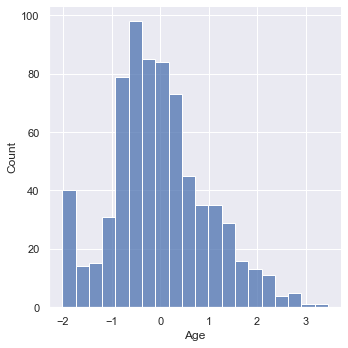

In [25]:
sns.displot((titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std())
# z-score
# outlier: |z| > 3

In [26]:
titanic.groupby(titanic['Age'] <= 10)['Survived'].mean()

Age
False    0.367594
True     0.593750
Name: Survived, dtype: float64

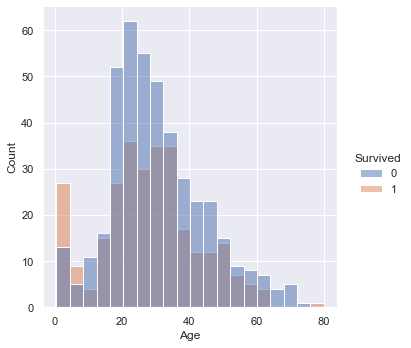

In [28]:
sns.displot(data=titanic, x='Age', hue='Survived')

In [33]:
smf.logit('Survived ~ Pclass + Sex + AgeRWM', data=titanic[titanic['Age'] > 10]).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.424638
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.364     
Dependent Variable: Survived         AIC:              560.0293  
Date:               2021-11-14 14:52 BIC:              577.9372  
No. Observations:   650              Log-Likelihood:   -276.01   
Df Model:           3                LL-Null:          -434.01   
Df Residuals:       646              LLR p-value:      3.4474e-68
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     4.7249    0.5687    8.3087  0.0000   3.6103   5.8395
Sex[T.male]  -2.8547    0.2296  -12.4339  0.0000  -3.3047  -2.4047
Pclass       -1.2415    0.1476   -8.4135  0.0000  -1.5307  -0.9523
AgeRWM       -0.0249    0.0093   -2.6627  0.0078  -0.0432  -0.0066
=================================================================

"""

In [34]:
smf.logit('Survived ~ Pclass + Sex + AgeRWM', data=titanic[titanic['Age'] <= 10]).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.536465
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.206     
Dependent Variable: Survived         AIC:              76.6676   
Date:               2021-11-14 14:53 BIC:              85.3031   
No. Observations:   64               Log-Likelihood:   -34.334   
Df Model:           3                LL-Null:          -43.230   
Df Residuals:       60               LLR p-value:      0.00048553
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      7.2236    2.3608   3.0598  0.0022   2.5965  11.8507
Sex[T.male]   -0.3587    0.5877  -0.6104  0.5416  -1.5107   0.7932
Pclass        -2.1105    0.8023  -2.6305  0.0085  -3.6831  -0.5380
AgeRWM        -0.1962    0.1006  -1.9496  0.0512  -0.3935   0.0010
=================================================================

"""